In [1]:
#!pip install python-sat

In [2]:
import matplotlib.pyplot as plt
from google.colab import files
from pysat.formula import CNF
from pysat.solvers import Solver
from sympy import symbols, Or, And, Not, simplify_logic
from itertools import combinations

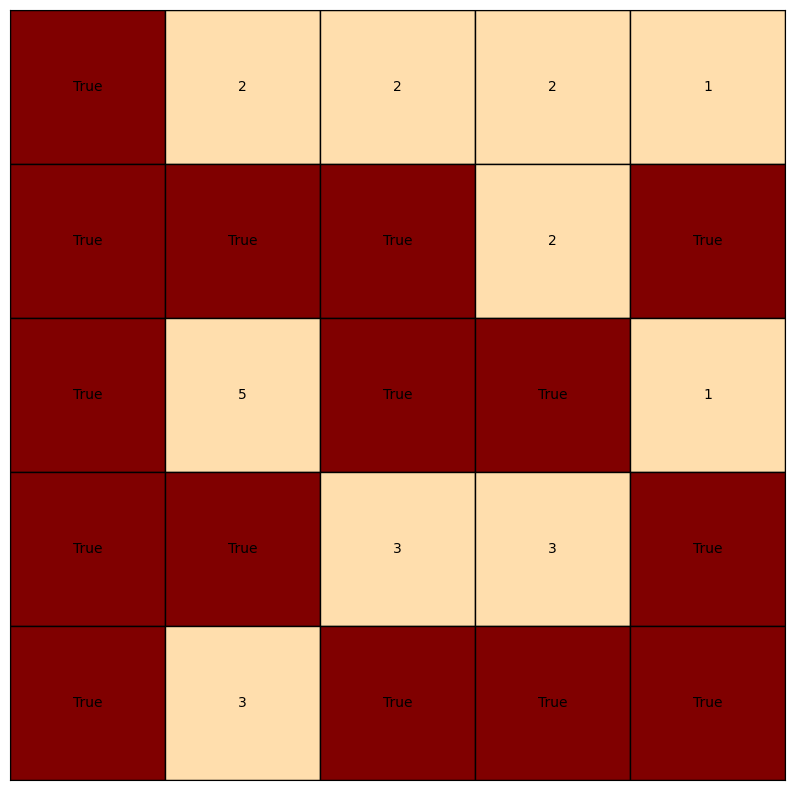

In [3]:
class Cell:
    def __init__(self, value, number, pos_row, pos_col, trap):
        self.value = value      #True: Trap, False: Gem, Digit: number of traps
        self.number = number    #Cell order
        self.row = pos_row
        self.col = pos_col
        self.traps = 0
        self.trap_or_gem_list = []

    def countTrap(self, matrix):
        size = len(matrix)
        if (self.value != True) and (self.value != False):
            if (self.row - 1 < 0): top = self.row
            else: top = self.row - 1

            if (self.row + 1 >= size): bottom = self.row
            else: bottom = self.row + 1

            if (self.col - 1 < 0): left = self.col
            else: left = self.col - 1

            if (self.col + 1 >= size): right = self.col
            else: right = self.col + 1

            for i in range(top, bottom + 1):
                for j in range(left, right + 1):
                    if (matrix[i][j].value == True):
                        self.traps = self.traps + 1

    def getTrapOrGem(self, matrix):
        size = len(matrix)
        if (self.value != True) and (self.value != False):
            if (self.row - 1 < 0): top = self.row
            else: top = self.row - 1

            if (self.row + 1 >= size): bottom = self.row
            else: bottom = self.row + 1

            if (self.col - 1 < 0): left = self.col
            else: left = self.col - 1

            if (self.col + 1 >= size): right = self.col
            else: right = self.col + 1

            for i in range(top, bottom + 1):
                for j in range(left, right + 1):
                    if (matrix[i][j].value == True) or (matrix[i][j].value == False):
                        self.trap_or_gem_list.append(matrix[i][j].number)

class Map():
    def readFile(self, filename):
        with open(filename, 'r') as file:
            lines = file.readlines()
            number = 1
            row_index = 0
            col_index = 0
            for line in lines:
                row = line.strip().split(',')
                row_values = []
                for value in row:
                    if (value.strip() == '_'):
                        val = Cell(True, number, row_index, col_index, True)
                        row_values.append(val)
                        number += 1
                    else:
                        val = Cell(value.strip(), number, row_index, col_index, False)
                        row_values.append(val)
                        number += 1
                    col_index = col_index + 1

                row_index = row_index + 1
                col_index = 0
                self.map_array.append(row_values)

            self.size = len(self.map_array)

    def __init__(self, filename):
        self.size = 0
        self.map_array = []
        self.readFile(filename)
        for row in self.map_array:
            for cell in row:
                cell.getTrapOrGem(self.map_array)

    def printMap(self):
        # Tạo figure và axes
        fig, ax = plt.subplots()

        fig.set_size_inches(10, 10)

        # Vẽ các ô vuông
        for i in range(0, self.size):
                for j in range(0, self.size):
                        if (self.map_array[i][j].value == True):
                            color = "maroon"
                        elif (self.map_array[i][j].value == False):
                            color = "rosybrown"
                        else:
                            color = "navajowhite"
                        rect = plt.Rectangle((j, i), 1, 1, facecolor=color, edgecolor="black")
                        ax.add_patch(rect)
                        # Ghi giá trị vào ô vuông
                        ax.text(j + 0.5, i + 0.5, (self.map_array[i][j].value), ha="center", va="center", fontsize=10)

        # Loại bỏ các trục số
        ax.set_xticks([])
        ax.set_yticks([])

        # Cài đặt giới hạn trục
        ax.set_xlim(0, self.size)
        ax.set_ylim(self.size, 0)

        # Hiển thị ma trận
        plt.show()

file_path = "/content/drive/MyDrive/Colab Notebooks/map/5x5/5x5.txt"
map = Map(file_path)
#map.readFile(file_path)

map.printMap()
#print(map.map_array[0][0].UnrevealedTiles)

In [4]:
for row in map.map_array:
    for cell in row:
        print(cell.value if cell.value != True else 'T', end=" ")
    print()
print()

for row in map.map_array:
    for cell in row:
        print(str(cell.number) if cell.number > 9 else '0' + str(cell.number), end=" ")
    print()
print()

for row in map.map_array:
    for cell in row:
        print(str(cell.row) + ':' + str(cell.col), end=" ")
    print()

print()
for row in map.map_array:
    for cell in row:
        if (len(cell.trap_or_gem_list) > 0):
            for i in cell.trap_or_gem_list:
                print(i, end=' ')
            print()

T 2 2 2 1 
T T T 2 T 
T 5 T T 1 
T T 3 3 T 
T 3 T T T 

01 02 03 04 05 
06 07 08 09 10 
11 12 13 14 15 
16 17 18 19 20 
21 22 23 24 25 

0:0 0:1 0:2 0:3 0:4 
1:0 1:1 1:2 1:3 1:4 
2:0 2:1 2:2 2:3 2:4 
3:0 3:1 3:2 3:3 3:4 
4:0 4:1 4:2 4:3 4:4 

1 6 7 8 
7 8 
8 10 
10 
8 10 13 14 
6 7 8 11 13 16 17 
10 14 20 
13 14 17 23 24 
13 14 20 23 24 25 
16 17 21 23 


In [25]:
def distribute_traps(TrapOrGem, NumOfTrap):
    #This function is used to create a list of list of int
    #The input TrapOrGem is the list of all the cell number that can be trap or gem surrounding one number tile
    #NumOfTrap is the original value on that number tile
    #The total number of list is the combination (Tổ hợp chập) of NumOfTrap out of len(TrapOrGem)

    result = []

    # Generate all combinations of traps
    for combo in combinations(range(len(TrapOrGem)), NumOfTrap):
        distributed = []
        for i in range(len(TrapOrGem)):
            if i in combo:
                distributed.append(TrapOrGem[i])  # Add trap (positive value)
            else:
                distributed.append(-TrapOrGem[i])   # Add gem (negative value)
        result.append(distributed)

    return result

def simplify_clause(all_trap_or_gem):
    #The input all_trap_or_gem is all possibility of trap or gem surrounding one number tile represented by a list of list of int
    #Before simplification, between list has the relation of Or
    #between int within a list has the relation of And
    #After simplification, between list has the relation of And
    #between int within a list has the relation of Or, which is suitable input for pysat CNF using extend method

    if len(all_trap_or_gem) == 0:
        return all_trap_or_gem
    elif len(all_trap_or_gem) == 1:
        return [[x] for x in all_trap_or_gem[0]]    #Convert Or to And

    #Preparation
    variables = ''
    for item in all_trap_or_gem[0]:
        variables += str(item) if item > 0 else str(item * -1)
        variables += ' '

    variables = variables[0:-1]     #variables is like '1 2 3 4'

    var = symbols(variables)        #var is a tuple of variable name

    Or_list = []                    #Between list is Or relation
    for arr in all_trap_or_gem:
        And_list = []               #Between list element is And relation
        for i in range(len(arr)):
            if arr[i] > 0:
                And_list.append(var[i])     #Add trap
            else:
                And_list.append(Not(var[i]))    #Add gem
        Or_list.append(And(*And_list))

    #Simplify
    expr = Or(*Or_list)
    simplified_expr = simplify_logic(expr)

    #Convert simplified_expr to list of list of int
    clauses = simplified_expr.args
    list_ = []
    for clause in clauses:
        list_.append(list(clause.args))
    for arr in list_:
        for i in range(len(arr)):
            arr[i] = str(arr[i])
            if arr[i][0] == '~':
                arr[i] = '-' + arr[i][1:]
            arr[i] = int(arr[i])
    return list_

def generateCNF(map_array):
    cnf = CNF()

    rows = len(map_array)
    cols = len(map_array[0])

    for i in range(rows):
        for j in range(cols):
            if (map_array[i][j].value != False) and (map_array[i][j].value != True):
                num_of_trap = int(map_array[i][j].value)                        #Number of positive int in trap_or_gem_list
                all_trap_or_gem = distribute_traps(map_array[i][j].trap_or_gem_list, num_of_trap)   #At this step, relation between list element is an And and between 2 list is Or
                #print(all_trap_or_gem)
                clauses = simplify_clause(all_trap_or_gem)                      #At this step, the logic expression above is simplified, relation between list element is Or and between 2 list is And
                print(clauses)
                cnf.extend(clauses)

    return cnf

cnf = generateCNF(map.map_array)                        #In pysat format
cnf_list = [list(clause) for clause in cnf.clauses]     #In list of list of int format

print()
print(cnf.clauses[0:10])
print(cnf_list[0:10])

[[1, 6, 7], [1, 6, 8], [1, 7, 8], [6, 7, 8], [-1, -6, -7], [-1, -6, -8], [-1, -7, -8], [-6, -7, -8]]
[[7], [8]]
[[8], [10]]
[[10]]
[[10, 13, 14], [10, 13, 8], [10, 14, 8], [13, 14, 8], [-10, -13, -14], [-10, -13, -8], [-10, -14, -8], [-13, -14, -8]]
[[11, 13, 16], [11, 13, 17], [11, 13, 6], [11, 13, 7], [11, 13, 8], [11, 16, 17], [11, 16, 6], [11, 16, 7], [11, 16, 8], [11, 17, 6], [11, 17, 7], [11, 17, 8], [11, 6, 7], [11, 6, 8], [11, 7, 8], [13, 16, 17], [13, 16, 6], [13, 16, 7], [13, 16, 8], [13, 17, 6], [13, 17, 7], [13, 17, 8], [13, 6, 7], [13, 6, 8], [13, 7, 8], [16, 17, 6], [16, 17, 7], [16, 17, 8], [16, 6, 7], [16, 6, 8], [16, 7, 8], [17, 6, 7], [17, 6, 8], [17, 7, 8], [6, 7, 8], [-11, -13, -16, -17, -6, -7], [-11, -13, -16, -17, -6, -8], [-11, -13, -16, -17, -7, -8], [-11, -13, -16, -6, -7, -8], [-11, -13, -17, -6, -7, -8], [-11, -16, -17, -6, -7, -8], [-13, -16, -17, -6, -7, -8]]
[[10, 14, 20], [-10, -14], [-10, -20], [-14, -20]]
[[13, 14, 17], [13, 14, 23], [13, 14, 24], [13,

In [26]:
with Solver(bootstrap_with=cnf) as solver:
    # 1.1 call the solver for this formula:
    print('formula is', f'{"s" if solver.solve() else "uns"}atisfiable')

    # 1.2 the formula is satisfiable and so has a model:
    print('and the model is:', solver.get_model())

    # 2.1 apply the MiniSat-like assumption interface:
    print('formula is',
        f'{"s" if solver.solve(assumptions=[1, 2]) else "uns"}atisfiable',
        'assuming x1 and x2')

    # 2.2 the formula is unsatisfiable,
    # i.e. an unsatisfiable core can be extracted:
    print('and the unsatisfiable core is:', solver.get_core())

formula is satisfiable
and the model is: [-1, -2, -3, -4, -5, -6, 7, 8, -9, 10, 11, -12, -13, -14, -15, 16, 17, -18, -19, -20, -21, -22, 23, 24, 25]
formula is unsatisfiable assuming x1 and x2
and the unsatisfiable core is: [1]


In [28]:
def dpll(cnf):
    def unit_propagation(assignments, clauses):
        # Apply unit propagation: assign truth values to unit clauses
        while True:
            unit_clause = None
            for clause in clauses:
                if len(clause) == 1:
                    unit_clause = clause[0]
                    break
            if unit_clause is None:
                break
            var, value = abs(unit_clause), unit_clause > 0
            assignments[var] = value
            clauses = [c for c in clauses if unit_clause not in c]
        return assignments, clauses

    def pure_literal_elimination(assignments, clauses):
        # Eliminate pure literals (variables that always appear with the same polarity)
        literals = set(lit for clause in clauses for lit in clause)
        for lit in literals:
            var = abs(lit)
            if var not in assignments:
                assignments[var] = lit > 0
        return assignments

    def choose_variable(clauses):
        # Choose an unassigned variable (heuristic: first unassigned literal)
        for clause in clauses:
            for lit in clause:
                var = abs(lit)
                if var not in assignments:
                    return var
        return None

    def backtrack(assignments, clauses):
        var = choose_variable(clauses)
        if var is None:
            return assignments
        # Try both true and false assignments
        for value in [True, False]:
            new_assignments = dict(assignments)
            new_assignments[var] = value
            new_clauses = [c for c in clauses if var not in c]
            result = dpll(new_assignments, new_clauses)
            if result is not None:
                return result
        return None

    assignments = {}
    assignments, cnf = unit_propagation(assignments, cnf)
    assignments = pure_literal_elimination(assignments, cnf)
    return backtrack(assignments, cnf)

# Example usage:
if __name__ == "__main__":
    # Example CNF: (x1 ∨ ¬x2) ∧ (¬x1 ∨ x3) ∧ (x2 ∨ x3)
    #cnf_example = [[1, -2], [-1, 3], [2, 3]]
    solution = dpll(cnf_list)
    print("Solution:", solution)

Solution: {7: True, 8: True, 10: True, 6: True, 11: True, 13: True, 14: True, 16: True, 17: True, 20: True, 21: True, 23: True, 24: True, 25: True, 1: False}
